## <p style="text-align: right;"> Nic Wiggins </p>

In order to successfully complete this assignment, you must follow all instructions in this notebook and upload your edited ipynb file with your answers on or before **11:59pm on Friday Mar. 22nd**.

**BIG HINT:** Read the entire homework before starting.  

# Homework: Pagerank



<img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/PageRanks-Example.jpg/1920px-PageRanks-Example.jpg" width="70%"> 
<p style="text-align: right;">Image from: https://en.wikipedia.org/wiki/PageRank/</p>



### Outline for Homework 4

</p>
1. Introduction of pagerank step by step
1. How to find the ranking $v$ efficiently

## 1. Pagerank

In the PageRank method, the ranking of pages is based solely on how pages are linked and not on the content of the pages or on how often the pages are visited. Google calculates the ranks at some frequency. Every time you do a search, Google gives a list
of the relevant pages in order of the lastest ranking. You can check the pagerank score of a website via http://www.prchecker.info/check_page_rank.php



In [60]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

11


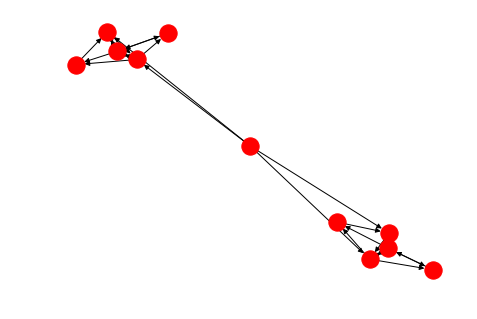

In [2]:
adj  = [(0, 1), (1, 2), (1, 3), (2, 0), (2, 4), (2, 3), (3, 4), (3, 0), (3, 1), (3, 2), (4, 3)]
adj += [(5, 6), (6, 7), (6, 8), (7, 5), (7, 9), (7, 8), (9, 8), (8, 5), (8, 6), (8, 7), (8, 9)]
adj += [(10,1), (10,2), (10, 6), (10,7)]
graph = nx.DiGraph(adj)
graph.add_node(10)
n = len(graph)
nx.draw(graph)

print(len(graph))

The matrix $A$ describes the links in this graph. $A_{ij}=1$ if page $j$ has a link to page $i$, and $A_{ij}=0$ if page $j$ does not have a link to page $i$.


In [3]:
A = np.transpose(nx.to_numpy_matrix(graph)) # form a matrix, 
#a_{ij} equals 1 if page j has a link to page i and 
#it equals 0 otherwise 
print(A)

[[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### The Simple Method (voting): 
We start with purely computing the number of pages having links to the page. 
We can think about one link as one vote, and the page that is link by the most pages has the highest ranking. 

$$v_{i}=a_{i1}+a_{i2}+\cdots+a_{in}$$

<font color='red'>**DO THIS:**</font> Write your code to count the number of pages having links to each page for all pages and apply it on the previous matrix $A$.

In [8]:
# Put your code here
v1 = A*np.ones((A.shape[0],1))
v1

matrix([[2.],
        [3.],
        [3.],
        [3.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [2.],
        [0.]])

Obviously, this approch has its drawbacks. 
We can not think about the links on different pages as the same. 
One link among a group of one hundred of links should not be treated as one link among a group of five links.
### First improvement:
To be included on a short list presumably means more than to be included on a long list. We should have a weight on different links.
$$v_{i}={a_{i1}\over n_1}+{a_{i2}\over n_2}+\cdots+{a_{in}\over n_n}$$
where $n_j=\sum\limits_i a_{ij}$ is the total number of recommendations that page $j$ makes.

<font color='red'>**DO THIS:**</font> Write your code to computer the improved ranking based on the previous matrix $A$. 

In [18]:
# Put your test code here
links = np.divide(np.ones((A.shape[0],1)),A.T*np.ones((A.shape[0],1)))
v2 = A*links
v2

matrix([[0.58333333],
        [1.5       ],
        [1.        ],
        [1.83333333],
        [0.58333333],
        [0.58333333],
        [1.5       ],
        [1.        ],
        [1.83333333],
        [0.58333333],
        [0.        ]])

## A further improvement:
Different pages should have different weight. 
For example, a link on www.msu.edu should be more important than a professor's personal website. 

Therefore, the weight of a recommendation should depend on the importance of the recommender. 

$$v_i = {a_{i1}\over n_1}v_1 + {a_{i2}\over n_2}v_2 + \cdots + {a_{in}\over n_n}v_n.$$
That is $$v=Pv.$$

<font color='red'>**DO THIS:**</font> Verify that the matrix $P$ is a Markov matrix. 


In [47]:
# Put your verify code here
P = A*np.diag(np.reshape(np.array(links),(11)))
# All columns add up to one as seen below
P.T*np.ones((A.shape[0],1))

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

<font color='red'>**DO THIS:**</font> Solve the Markov system for a improved ranking $v3$.

In [54]:
import sympy as sym

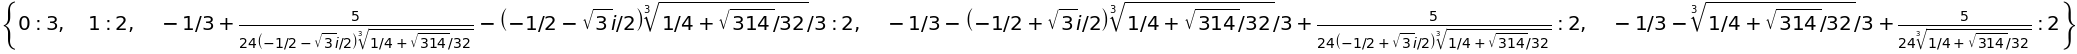

In [61]:
sym.Matrix(P).eigenvals()

In [63]:
vals, vects = np.linalg.eig(P)
vals

array([ 1.00000000e+00+0.j       , -2.90407534e-01+0.4624513j,
       -2.90407534e-01-0.4624513j, -4.19184931e-01+0.j       ,
        1.38888372e-17+0.j       ,  1.00000000e+00+0.j       ,
       -2.90407534e-01+0.4624513j, -2.90407534e-01-0.4624513j,
       -4.19184931e-01+0.j       ,  1.38888372e-17+0.j       ,
        0.00000000e+00+0.j       ])

If you are doing correctly, you may obtain a ranking with many zeros. 
Think about the reason why this happens? (Hint, if we start with zeros for some pages, the values for these pages will stay zero.)

<font color='red'>**QUESTION:**</font> Why some values are zeros? Does it mean that these pages are not important?

Relative to the other pages, the page is not important

## A final improvement: uniqueness
Let's consider a simple case. 
What happens if there are several clusters of webpages not connected to each other and having no dead ends.

In [64]:
graph2 = nx.DiGraph([(0,1),(1,0),(2,3),(3,2)])
A2 = np.transpose(nx.to_numpy_matrix(graph2)) # form a matrix, 
P2 = A2
for node in graph2:
    if len(graph2[node]) != 0:
        P2[:,node] = np.divide(A2[:,node],len(graph2[node]))  
        
w, v = np.linalg.eig(P2)
w, v  

(array([ 1., -1.,  1., -1.]),
 matrix([[ 0.70710678, -0.70710678,  0.        ,  0.        ],
         [ 0.70710678,  0.70710678,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.70710678, -0.70710678],
         [ 0.        ,  0.        ,  0.70710678,  0.70710678]]))

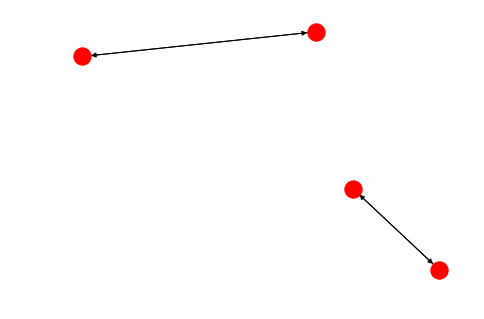

In [65]:
nx.draw(graph2)

We want to find an eigenvector corresponding to the eigenvalue 1. If there are two linear independent eigenvectors having the same eigenvalue 1, we obtain nonunique solutions and there may be zeros in the ranking (at least we can find these eigenvectors). 

For this simple case, there are two eigenvalues $1$. The nodes 0 and 1 form a cluster and there is no links between this cluster with nodes 2 and 3.

In general, if it is possible to get from page $j$ to page $i$ by following links but not vice versa, then $v_j$ turns out to be 0.
In order to get all nonzeros, we have to make sure that the graph is connected. That is, starting from any page, you can arrive at any other page through the links.



In order to fix this, imagine you have a biased coin, so that the probability of heads is $r$. Now move around the web as follows. If you're on page $j$, flip the coin. If you get heads, then choose randomly one of the links from page $j$ and
follow that link. If the coin comes up tails, then pick a page at random from the whole web and jump (or "teleport") to that page. 

<font color='red'>**DO THIS:**</font>  Finish the code to construct the new matrix $Q$ with $r=0.85$.

In [71]:
r = 0.85

#Put you code here for the matrix that simulate the teleport from one page to any page (including itself)
T = 1/A.shape[0]*np.ones((A.shape[0],A.shape[0]))

Q = r*P + (1-r)*T

<font color='red'>**DO THIS:**</font> Check that $Q$ has only one independent eigenvector for eigenvalue 1. 
Find the corresponding eigenvector and normalize it such that the sum equals one.

In [86]:
vals,vects = np.linalg.eig(Q)
vals[4]

(1.0000000000000002+0j)

In [89]:
vects[:,4]/sum(vects[:,4])

matrix([[0.07158101+0.j],
        [0.10868153+0.j],
        [0.09402732+0.j],
        [0.14731095+0.j],
        [0.07158101+0.j],
        [0.07158101+0.j],
        [0.10868153+0.j],
        [0.09402732+0.j],
        [0.14731095+0.j],
        [0.07158101+0.j],
        [0.01363636+0.j]])

Check the result with the pagerank algortihm from networkX

In [90]:
v2 = nx.pagerank(graph)
v2

There are several functions in the networkX for computing the pagerank. 
The following code compares the time for these settings. (You can change the value for *tol* and see the performance in time and the accuracy).

In [85]:
%timeit nx.pagerank(graph,tol=1e-1)
%timeit nx.pagerank_scipy(graph,tol=1e-10)
%timeit nx.pagerank(graph)

266 µs ± 6.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.72 ms ± 820 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.32 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 2. How to find the ranking $v$ efficiently

In the previous section, we discussed how to build the Markov matrix for pagerank. 
We start with a *sparse* Markov matrix $P$ (a matrix with many zeros). However, this matrix may have *dead-end* (there are more than one independent eigenvectors for the eigenvalue 1, and the eigenvalue can be zeros for many pages). 
Therefore, we introduce a new Markov matrix $T$ that describes moving around the internet without following the links (the chance to go to any page is the same). 
Assume that we have chance $r=85\%$ choosing the *sparse* matrix $P$, and $1-r=15\%$ choosing the matrix $T$. 
The new Markov matrix together is 
$$Q = rP + (1 − r)T.$$

It is impossible for Google to update the rank by finding the exact eigenvalue using an eig solver. 
In the following, we test the time for computing the eigenvector for up to $128\times 128$ matrix.

In [102]:
import time

k_list = [2, 4, 8, 16, 32, 64, 128]

eig_time = []

for k in k_list:
    #Generate random nxn array of two lists
    result = np.identity(k) + np.random.uniform(low=0., high=.25, size=(k, k))
    result /= result.sum(axis=1, keepdims=1)
    
    start = time.time()
    np.linalg.eig(result)
    stop = time.time()
    eig_time.append(stop - start) 
print(eig_time)

[0.00013399124145507812, 9.012222290039062e-05, 0.00017595291137695312, 0.00035881996154785156, 0.0007059574127197266, 0.0029633045196533203, 0.013194084167480469]


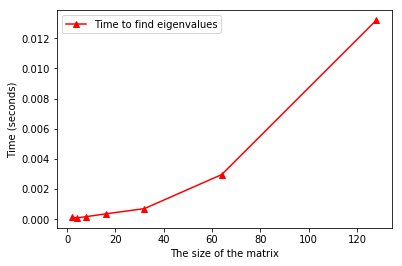

In [103]:
plt.plot(k_list, eig_time, 'r-^', label="Time to find eigenvalues")
plt.xlabel('The size of the matrix');
plt.ylabel('Time (seconds)');
plt.legend();

<font color='red'>**QUESTION:**</font> Estimate how long does it take to compute the eigenvectors for a $10^9\times 10^9$ Markov matrix. ($10^9$ is still small comparing to the number of pages)

In [115]:
((0.0029633045196533203/64**3)*(10**9)**3)/(60*60*24*365)

358450965510.3921 years

You may notice that the time for computing eigenvectors is too long for big matrices. 
So we have to use alternative ways to find the rank (the eigenvector corresponding to eigenvalue 1). 
From our lecture on Eig_problems (Lecture 09), we know that we can use iterative algorithms to find the eigenvector for a Markov matrix that corresponding to the eigenvalue 1. 
Though we need many matrix-vector multiplications, the computation can be efficient. 
Furthermore, when we update the matrix (new pages are added, new links are added), we do not need to start it again. We can use the previous ranking as the initial to save time.
Next, let's think about how to do the matrix-vector multiplication for the large matrix.

For sparse matrix, we have fast computation. But, this matrix $Q$ is not sparse any more. 
The complexity for the multiplication of a $n\times n$ matrix with a $n\times 1$ vector is $n^2$ for a general matrix. 
However, if the matrix is sparse with only $N$ nonzero. The complexity becomes $N$. 
For the matrix $P$ we derived, it is very sparse (say, $n=10^9$, and the links for each page is only in the order of 10s, so the number of nonzero entries is only about $10^{10}$, but the  total number of elements in the matrix is $10^{18}$).
How can be use this property of sparse matrix to compute for $Qw$ for a given column vector $w$.

Given a rank $w$, we update the rank by the following computation:
$$Qw = rPw + (1 − r)T w= rPw + (1-r){u\over n} \mathbf{1},$$
where $u$ is the sum of all elements in $w$, and $\mathbf{1}$ is a column vector with all $1$s. 
It works because of the special matrix $T$, whose elements are all ${1\over n}$. 
The effect of $T$ is just finding the average of all elements in $w$ and 

<font color='red'>**DO THIS:**</font> Write the code to compute the matrix vector muptlication $Qw$ without using the matrix $P$. (Assume we are giving only $P$ and $r$) 

In [179]:
def update_rank(graph, r, ranks):

    #Step 1: find the matrix P based on the preivous tasks
    A = np.transpose(nx.to_numpy_matrix(graph))
    links = np.divide(np.ones((A.shape[0],1)),A.T*np.ones((A.shape[0],1)))
    P = A*np.diag(np.reshape(np.array(links),(A.shape[0])))
    
    #Step 2: find rPW
    rPw = P*ranks.reshape((1,len(ranks))).T
    
    #Step 3: find rPW + (1-r) u/n
    
    update = rPw + (1-r)*sum(w)/A.shape[0]

    return update

In [183]:
# Iterative methods for pagerank. 
def compute_ranks(graph, r, numloops):
    npages = len(graph)
    ranks = np.zeros(npages)
    for page in graph:
        ranks[page] = 1.0 / npages

    for i in range(0, numloops):
        newranks = update_rank(graph, r, ranks)
        ranks = newranks
    return(newranks)

In [184]:
compute_ranks(graph,0.85,100)

matrix([[0.0703125],
        [0.109375 ],
        [0.09375  ],
        [0.15625  ],
        [0.0703125],
        [0.0703125],
        [0.109375 ],
        [0.09375  ],
        [0.15625  ],
        [0.0703125],
        [0.       ]])

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for the homework's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees